# Welcome to Coding 2! 

Welcome to the 2020 Data Science Bootcamp! This session is Day 1 of the two-week Coding for Research course. 

Your **instructors** for this course:
* Haynes Stephens
* Iván Higuera-Mendieta
* Amanda Farah

Your **TAs**:
* Jonathan Colen
* Jordan Kemp
* Jim Franke
* Ziwei Wang

PSA: like most events in 2020, this will be the first time that we conduct this bootcamp remotely. While we've considered this at every step in our planning, we'll be blown away if we don't hit our fair share of snags along the way. We will address any technical issues on our side as quickly as we can to keep the course on track. If you experience any on your end, please let our TAs know as soon as you can. Just wanted to give a heads up before we tempt Murphy's Law these next two weeks. 

**Before we start**, please go to the 'View' tab up top and click the 'Collapse sections' command.

# Section 1: Course summary

## 1.1 Roadmap for the course


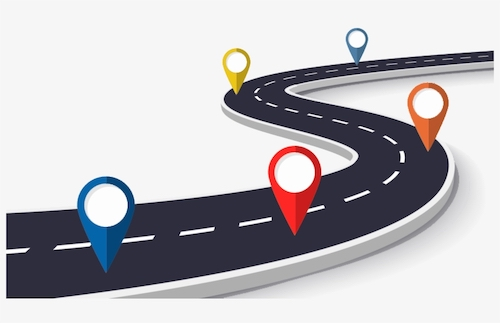

Day 1. **"Getting on the same page"** & **"Getting familiar with `pandas`"**

Day 2. **"Becoming a `pandas` master"**

Day 3. **"Becoming a `numpy` master"**

Day 4. **"Working with the RCC" (Jonathan Skone)**

Day 5. **"Managing big data operations with `xarray`"**

Day 6. **"Visualizing your data without wasting time" - `Seaborn`, `Plotly Express`, `Xarray plotting`, `Geoviews`**

Day 7. **"Doing regressions in Python (and R)"**

Day 8. **"Keeping good coding habits with `git`"**

Day 9. Overflow or group project

## 1.2 What you'll be able to do in this course.

The objective of this course is to teach you Python coding skills that will help you improve your own research techniques. This course uses examples primarily from the environmental sciences, but the skills are transferrable across disciplines. Most graduate students need to know some level of coding, even though many of us were not exposed to coding formally. And our advisors either don't know how to code at all or only know how to use the ancient languages of `Fortran` and `C`. So we have had to learn a lot on our own, and this bootcamp was established in the hopes that we can share what we've learned so that students doesn't have to learn the same thing the hard way. 

Much of this information is available, the challenge is knowing what is available and where to look. The goal of our course is to show you some useful skills and open your awareness of what's out there to help you. 

For example, a lot of my research deals with climate data, so I have had to come up with ways of exploring and analyzing files that are multiple gigabytes, if not terabytes of data! My program never offered me a coding course so it was up to me and my labmates to figure out or own problems. Through much google searching and trial-and-error we developed some very helpful methods. Here's one of the things we've been able figure out through our own efforts. The code below loads temperature data from an online repository for climate models and plots it through an interactive interface, allowing us to step through time in our data. 

**By the end of this tutorial, you will know the essential steps to create a plot like this and much more!**

In [ ]:
%%capture 
!apt-get install -qq libgdal-dev libproj-dev libgeos++ 
!pip install --no-binary shapely shapely --force
!pip install cartopy geoviews
!pip install --upgrade zarr gcsfs cftime nc-time-axis netcdf4 xarray 

import cartopy.crs as ccrs, cartopy.feature as cfeature
import matplotlib.pyplot as plt, geoviews as gv, geoviews.feature as gf
from geoviews import opts
import numpy as np; import pandas as pd, xarray as xr
import zarr, gcsfs; gcs = gcsfs.GCSFileSystem(token='anon')

In [ ]:
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df = df.query("activity_id=='ScenarioMIP' & variable_id == 'tas' & experiment_id == 'ssp585' & source_id == 'IPSL-CM6A-LR' & table_id == 'day'")
ds = xr.open_zarr( gcs.get_mapper( df.zstore.values[0] ), consolidated=True)
ds = ds - 273.15

**Figure 1**: Daily temperature for January, 2020

In [ ]:
gv.extension('bokeh')
dataset = gv.Dataset(ds.sel(time=slice('2020-08-01', '2020-09-01')), 
                     kdims=['lon', 'lat', 'time'], vdims=['tas'], crs=ccrs.PlateCarree())
dataset = dataset.redim.range( tas = (-50, 50) )
images = dataset.to(gv.Image)
images.opts(cmap='seismic', colorbar=True, width=750, height=550) * gf.coastline

**Figure 2**: Average yearly temperature from 2020 to 2100

In [ ]:
gv.extension('bokeh')
dataset = gv.Dataset(ds.sel(time=slice('2020', '2100')).resample(time='5A').mean(), 
                     kdims=['lon', 'lat', 'time'], vdims=['tas'], crs=ccrs.PlateCarree())
dataset = dataset.redim.range( tas = (-50, 50) )
images = dataset.to(gv.Image)
images.opts(cmap='seismic', colorbar=True, width=750, height=550) * gf.coastline

## 1.3 Mechanics of the course
*   Classes will be held on **Zoom calls**
*   **Colab notebooks** (this thing!) will be used for live coding and exercises
*   We want all students to feel free to ask questions. Due to the size of the class, we wanted to avoid the potential chaos of the zoom chat. So we have split up students and assigned each of you to a TA. Your TA has their own Google Doc to field your questions. In your assigned Google Doc, you can **ask questions** and **post code snippets** for the TA to look at if you're having any trouble with your code.
*   If you have any questions about clarification or understanding, please ask them immediately. The TA will either answer them directly or notify the instructor to answer the question for the entire class. 
*   If you have questions that can wait, please make a note of them and come to office hours where the TAs will be avaiable to talk with you individually or in smaller groups. Office hours will be held every day for an hour after class.
* **A fundamental part of coding is knowing why your code does or doesn't work the way you intended**. If you're code isn't working the way you want it to, please come to office hours and we can take a look at it and do our best to help you out. 

## 1.4 Lesson format - live coding
1.   Check-in from last class
2.   Instruction, check-in exercises (no copy/paste), and breaks
4.   After-class office hours (1 hour)







# Section 2: Today - **"Getting on the same page"**

## 2.1 Navigating Google Colaboratory

This is a **Google Colab Notebook**. If you've ever used an IPython or Jupyter notebook before, it's basically the same thing. The Colab Notebook works through Google Drive, so your computer is saved from having to store big data files and do intense computing.

First, let's explore the toolbar above.

* Go to *Tools --> Settings --> Site* and decide to not save outputs. This helps keep from weighing down your notebook by saving all the output from previous sessions.

* If you don't like the blinding white light of this notebook, you can change the theme to Dark in *Tools --> Settings --> Site --> Theme*.

* Check out the *Runtime* tab. These are all the options you have for how you want to run cells in your notebook.

* On the far right you'll see two bars, one labeled "RAM" and one labeled "Disk". These two bars tell you how much memory your notebook is using. You want to be careful not to blow through your RAM space or your notebook will crash, like a normal computer would.

Now let's look at the two types of cells we use in a Colab notebook.

This is a markdown cell. You can edit it by double-clicking on the cell or clicking on the pencil icon in the top right corner of the cell. You can close the cell by clicking on another cell, clicking on the pencil icon again, or by hitting **Shift+Enter**

In [ ]:
# This is a code cell. You can run a single code cell by hitting [Shift]+[Enter].
# Another option is hitting the PLAY button on the left side of this cell. 
# Other options for running cells can be found in the "Runtime" tab.

You have multiple ways of **inserting new cells** in your Colab Notebook:

1. Upper lefthand corner
2. In the "Insert" tab
3. Between cells in the notebook
4. Keyboard shortcuts (see "Insert" tab)

You can also delete cells multiple ways:
1. The trash can icon
2. The "Edit" tab
3. Keyboard shortcut (see "Edit" tab)

**Quick exercise**: insert an empty markdown cell and an empty code cell, each in a different way. Now delete each cell in a different way. 

**Remember:** if you accidentally delete a cell that you didn't want to, you can undo your delete in the "Edit" tab

You can add markdown cells to your Table of Contents by using the "hashtag" formatting. Open up the following three markdown cell to see:

# A single hashtag means a heading.

## A double hashtag means a sub-heading.

### A triple hashtage means a sub-sub-heading, and so on.

Headings and sub-headings are automatically formatted in the Table and relative to each other (see the arrows?)

In [ ]:
# Code cells do not show up in the Table of Contents

### 2.1.1 Shell commands

Most shell commands work in the following fashion 
*   %cd *dir*
*   !ls
*   !pwd

In [ ]:
ls

## 2.2 Magic commands
Cell magic commands from IPython come with Colab Notebook. <br>
https://nbviewer.jupyter.org/github/ipython/ipython/blob/1.x/examples/notebooks/Cell%20Magics.ipynb

In [ ]:
%lsmagic

A simple example of what you could do with cell magic: the `%%time` command.

In [ ]:
# 'Magic' command in ipython notebook cells
%%time
for i in range(10*6):
    calc = i ** 2

Wall time is the actual time, usually measured in seconds, that a program takes to run or to execute its assigned tasks. <br>
*Reference*:
https://whatis.techtarget.com/definition/wall-time-real-world-time-or-wall-clock-time

Another command we'll use in this course is `%%capture`, which hides all the output from the cell as it runs. This command comes in handy when you're dealing with installing libraries, or running code that has a lot of unwanted output. Warning: it hides **all** output except for error messages, so make sure there's nothing you need to see.

In [ ]:
%%capture
for i in range(5000):
    print(i)

## 2.3 Setting up your notebook

You can import Python packages as you normally would. Most are already pre-loaded in Google Colab.

In [ ]:
### Loading python packages
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt

Some Python packages are not pre-loaded in Colab. 

In [ ]:
# Installing Python packages that do not come pre-loaded in Colab.
import netCDF4

You need to install these with `!pip` before importing the library.

In [ ]:
!pip install netCDF4

In [ ]:
import netCDF4

## 2.4 Check-in 1

In the cell below, import the `earthpy` library and hide all the loading information. Remember the **cell magic** command we learned earlier.  

In [ ]:
# WRITE YOUR CODE HERE

### Answer 1

In [ ]:
%%capture 
!pip install earthpy
import earthpy

**Note**: the `%%capture` command will **not** hide errors. 

## 2.5 Now let's get moving.

Now that we've got our bearings in the Colab Notebook, let's make sure everyone's up-to-speed with plotting fundamentals in Python with `matplotlib`. We'll be plotting a lot throughout this course, especially in Week 2, so this is hopefully a lil' taste of `matplotlib` if you're new and a lil' refresher if you already know.

# Section 3: Plotting fundamentals

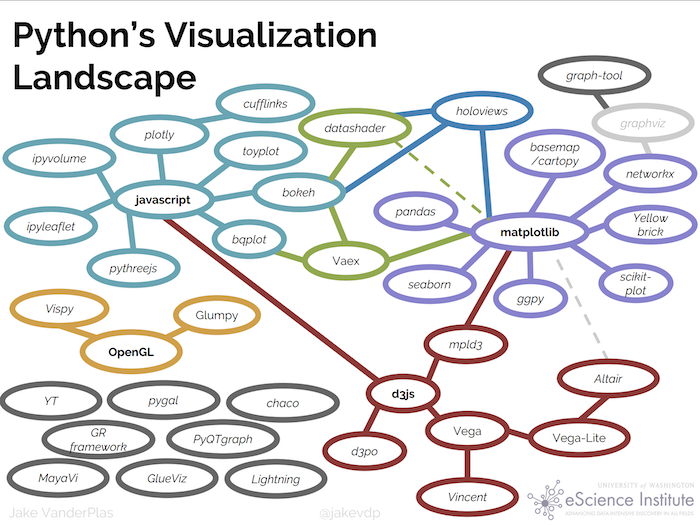

The mathematician Richard Hamming once said, “The purpose of computing is insight, not numbers,” and the best way to develop insight is often to visualize data. Visualization will get an entire lecture of its own, but we can explore a few features of Python’s matplotlib library here. While there is no official plotting library, matplotlib is the de facto standard. First, we will import the `pyplot` module from `matplotlib`:

In [ ]:
from matplotlib import pyplot as plt

## 3.1 Single plot

Next, let's make a single plot in Matplotlib. This plot will show how temperature changes over time.

In [ ]:
plt.figure(figsize=(8,8))          # Create the figure and specify the FIGSIZE (width, height)


time = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]                  # Data for month
temperature = [32, 34, 43, 55, 65, 75, 81, 79, 73, 61, 47, 36]  # Data for average monthly temperature

# The two data variables must have the same length

plt.plot(time, temperature)                     # Plot your data in (x, y) format
plt.xlabel('Time (month)')                      # Set the label of the x-axis
plt.ylabel('Temperature (F)')                   # Set the label of the y-axis
plt.title('Chicago Monthly High Temperature')   # Set the title for the plot
plt.show()

*Plot theory*: we want to use a line plot like this when we our data are moving across a continous number range. In environmental scienes, we often use line plots that go across time (as shown here), latitude, longitude, or height. It is important in a line plot that the data be related to each other. 


## 3.2 Check-in 2

**Exercise**: create your own list data and plot it in a single plot using `plt` functions. Use the title and labels to describe the plot.

*Tip*: you can use the input `color=` in your `plt.plot` function to change the color of the line. Example: `plt.plot(x, y, color='red')`

In [ ]:
# WRITE YOUR CODE HERE

### Answer 2

In [ ]:
plt.figure(figsize=(8,8))   # Create the figure and specify the FIGSIZE (width, height)
tacos = [0, 2, 5, 8, 10]    # How many tacos I eat in a single sitting
naptime = [0, 3, 4, 5, 20]  # How long of a nap I need afterwards

plt.plot(tacos, naptime, color='red')
plt.xlabel('Tacos eaten in a single sitting')
plt.ylabel('Length of nap (hours)')
plt.title('More tacos, more nap')
plt.show()

## 3.3 EXTRA - Scatter plots

What if the data points we're plotting are not connected to each other? In that case, we'll need to create a **scatter plot**.

*Plot theory*: a scatter plot removes the implication that the data are in some way connected.

Let's look at an example where we plot the height and weight of eight random people.

In [ ]:
plt.figure(figsize=(8,8))          # Create the figure and specify the FIGSIZE (width, height)


height = [63, 70, 72, 61, 80, 75, 63, 69]          # Height data  
weight = [150, 180, 135, 101, 210, 275, 110, 195]  # Weight data

# Now we make a LINE plot.
plt.plot(height, weight)
plt.xlabel('Height (inches)')                     
plt.ylabel('Weight (pounds)')                   
plt.title('Height and Weight') 
plt.show()

Wow, that doesn't look right! In this case, we don't want our data points connected by lines. Each data entry represents a individual, so we want to show them as individual points. 

If we want to plot our data as individual points, instead of as a line, we can use `plt.scatter()`

In [ ]:
plt.figure(figsize=(8,8))          # Create the figure and specify the FIGSIZE (width, height)


# Same data
height = [63, 70, 72, 61, 80, 75, 63, 69]          # Height data  
weight = [150, 180, 135, 101, 210, 275, 110, 195]  # Weight data

# Now we make a SCATTER plot instead.
plt.scatter(height, weight)

plt.xlabel('Height (inches)')                     
plt.ylabel('Weight (pounds)')                   
plt.title('Height and Weight') 
plt.show()

Phew, that's better! Now we can see our data points clearly.

## 3.4 EXTRA - Subplots

The last `matplotlib` thing we'll tackle today is SUBPLOTS! When you want to put several plots into a single figure, you need to create subplots. You can do this with the `plt.subplots()` command. Each subplot in the figure is represented by something called an AXIS object. 

When you're working with an AXIS object, you use `ax.plot()` instead of `plt.plot()`. The same goes for specifying labels and titles. Let's follow the example below.

In [ ]:
# Let's use the HEIGHT and WEIGHT data from before
height = [63, 70, 72, 61, 80, 75, 63, 69]          
weight = [150, 180, 135, 101, 210, 275, 110, 195] 

# and let's add one more set of data for the AGE of the people
age = [24, 35, 19, 55, 69, 32, 44, 59]

# Create a figure with two subplots. We'll name the subplots AX1 and AX2

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))      # plt.subplots(NUMBER OF ROWS, NUMBER OF COLUMNS)

ax1.scatter(height, weight)             # plot HEIGHT vs. WEIGHT as a scatter plot in the first subplot AX1.
ax1.set_xlabel('Height (inches)')       # AXIS objects use `.set_xlabel()` instead of `.xlabel()`
ax1.set_ylabel('Weight (pounds)')

# Notice how we are now plotting for the AX2 subplot, so we use its name in the function call. 
ax2.scatter(age, height)                # plot HEIGHT vs. WEIGHT as a scatter plot in the first subplot AX2.
ax2.set_xlabel('Age (years)')
ax2.set_ylabel('Height (inches)')

plt.show()

## 3.5 EXTRA - Check-in 3

This is the last check-in for the plotting section. In the code below, create two subplots. The subplots should include:

*    2 rows, 1 column
*    A line plot and a scatter plot
*    Each plot in a different color

In [ ]:
# HERE'S SOME DATA YOU CAN USE
time        = [0, 6, 12, 18]        # Time of day (hours, 0=midnight)
temperature = [80, 95, 105, 97]     # Temperature at that time (farenheit)
rainfall    = [8, 2, 9, 4]          # Rainfall at that time (inches/day)

# WRITE YOUR CODE HERE

### Answer 3

In [ ]:
time        = [0, 6, 12, 18]        # Time of day (hours, 0=midnight)
temperature = [80, 95, 105, 97]     # Temperature at that time (farenheit)
rainfall    = [8, 2, 9, 4]          # Rainfall at that time (inches/hour)

# Create a figure with two subplots. We'll name the subplots AX1 and AX2

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(4, 8))  # plt.subplots(NUMBER OF ROWS, NUMBER OF COLUMNS)

ax1.plot(time, rainfall, color = 'blue')     # plot RAIN vs. TIME as a line plot in the first subplot AX1.
ax1.set_xlabel('Time (hours)')               # AXIS objects use `.set_xlabel()` instead of `.xlabel()`
ax1.set_ylabel('Rainfall (in/day)')

# Notice how we are now plotting for the AX2 subplot, so we use its name in the function call. 
ax2.scatter(rainfall, temperature, color = 'red')  # plot TEMPERATURE vs. RAIN as a scatter plot in AX2.
ax2.set_xlabel('Rainfall (in/day)')
ax2.set_ylabel('Temperature (in/day)')

plt.show()

## 3.6 Congratulations! 

We've made it through the PLOTTING FUNDAMENTALS. Let's summarize what we've learned and then take a short break.

**KEY POINTS**:
*    Matplotlib is the foundational plotting package in Python
*    Line plots imply connection, scatter plots imply distinction
*    Single plots can be created using the PyPlot command (e.g. `plt.plot()` or `plt.scatter()`)
*    Subplots in the same figure need to be created using their respective AXES objects (e.g. `ax.plot()` or `ax.scatter()`)

# Section 4: Data Structures

Now that we've gotten a little familiar with visualizing data, let's look at the different types of data structures. There are many different types of data structures. Common Python data types that you might already know are integers, floats, lists, and dictionaries. 

Here we'll cover briefly two widely popular types of data structures:  `pandas` **dataframes** and `numpy` **arrays**. We'll also look at ways to manipulate and visualize these data structures for the purpose of research.

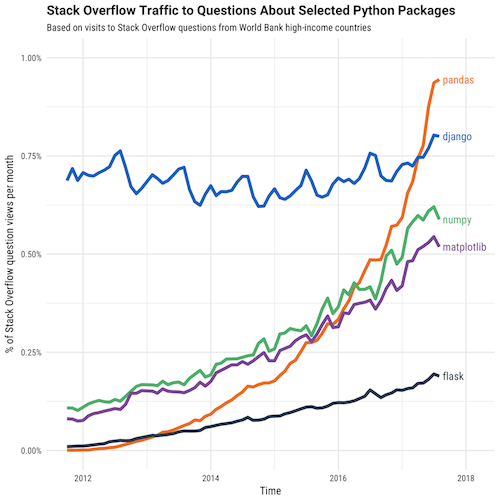

# Section 5: `pandas` dataframe

Let's start by looking at the `pandas` package. `pandas` is an extremely popular Python package that works with tabular data. Tabular data means data that is formatted like a table. A Microsoft Excel Spreadsheet is a form of tabular data. 

Tabular data in `pandas` is called a dataframe. 

Dataframes are composed of ROWS and COLUMNS that can have header names, and the COLUMNS in dataframes can be different types (e.g. integers, floats, strings).

Each value in a dataframe is referred to as a CELL. Each CELL has a specific ROW index and COLUMN index within the tabular structure.



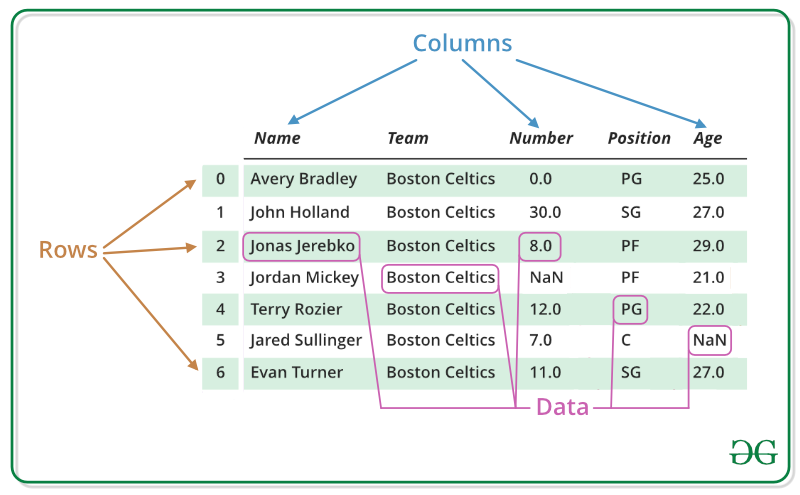

Each COLUMN in a DATAFRAME is called a SERIES. A SERIES must be one-dimensional and consist of data of the same type (e.g. a string, a float, an integer).


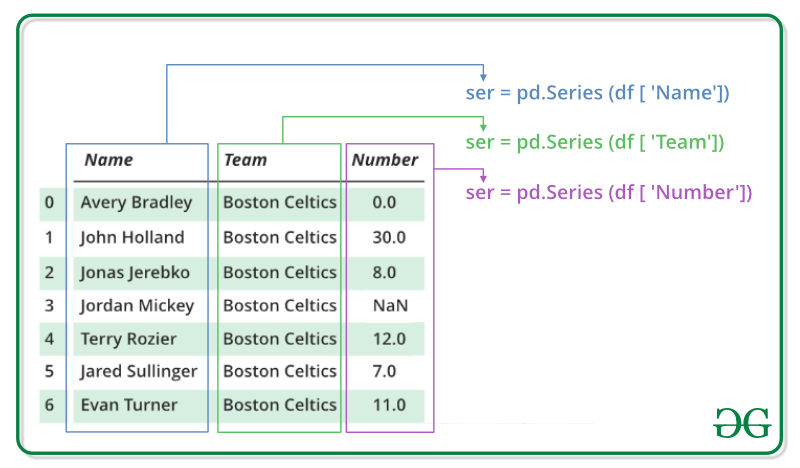

These characteristics (i.e. tabular format with ROWS and COLUMNS) make `pandas` dataframes very versatile for not only storing different types of data, but for maintaining the relationships between cells across the same ROW and/or COLUMN.

**Goals of this section:**

1.   Build a  dataframe.
2.   Slicing a dataFrame (selecting columns, combining, subsetting). 
3.   Loading a dataframe from a file.



## 5.1 Building a dataframe

First, let's import the `pandas` Package

In [ ]:
# Import pandas with alias pd
import pandas as pd

Next, let's create a dataframe of monthly precipitation values in Chicago. We'll do this using the `pd.DataFrame()` function, specifying the `data` we want to include with a dictionary. Here's some Chicago weather data.

In [ ]:
# Create a DATAFRAME from a dictionary with keys as columns as values as data
data = {'DATE': ['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06', '2017-01-07'],
        'day' : [1, 2, 3, 4, 5, 6, 7],
        'TMAX': [40.0, 41.0, 39.0, 39.0, 19.0, 15.0, 11.0],
        'TMIN': [20.0, 22.0, 35.0, 9.0, 6.0, 0.0, 0.0], 
        'PRCP': [0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0]}

# Average monthly precip for Chicago, IL
df = pd.DataFrame(data)

# Notice the nicely formatted output WITHOUT use of print
df

You can see in the outputted dataframe above that every ROW is given a unique index value. This is how `pandas` is able to keep track of the rows.


Google Colab offers an interactive display to dataframes which can come in handy when you're exploring a new dataframe.

In [ ]:
%load_ext google.colab.data_table
# Now see what it looks like when you show your dataframe

In [ ]:
df

If you like the old way better, you can unload the interactive display with:

`%unload_ext google.colab.data_table`

## 5.2 Loading a DATAFRAME from a csv file


Now that we're familiar with a dataframe, let's get some experience loading one in and working with it. In research we rarely actually write out all the data we're going to put in our dataframe. More often we get the data by reading in files. The most common file type for dataframes is known as a comma-separated-value file (csv). 

CSV is a standard for storing tabular data in text format, where commas are used to separate the different columns, and newlines (carriage return / press enter) used to separate rows. Typically, the first row in a CSV file contains the names of the columns for the data.

And example table data set and the corresponding CSV-format data is shown in the diagram below.


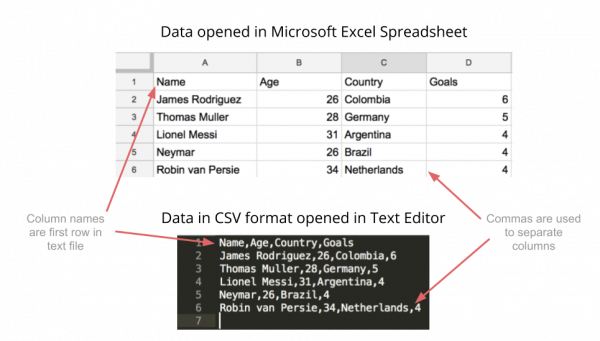

### 5.2.1 Mounting to Google Drive

Mounting a notebook lets you access all the files you have in your Google Drive and any Shared Drives. To do this we need to first import the `drive` package


In [ ]:
### Mounting to your google drive so you can access files
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Now that we're mounted on the drive, we have access to the directories and files in our Google Drive. Take a look at the folder icon on the far left that says "Folders".

In [ ]:
import os
print(os.getcwd())

In [ ]:
!pwd

In [ ]:
print(os.listdir(os.getcwd()))

Let's save string variables for the directories we'll be using. We want to load files from the `loaddir` directory and save result to the `savedir` directory.

In [ ]:
loaddir = '/content/drive/Shared drives/Coding_Bootcamps_2020/computing_for_research/data'
savedir = '/content/drive/My Drive/my_bootcamp_2020'

It's good practice to store any common directory paths as variables so that you don't have to retype them. Now we should have access to load files from our Drive, like with this code below.

In [ ]:
df = pd.read_csv(loaddir + 'Day1_chicago_weather_clean.csv')
df

Uh oh! The code above should have thrown an Error: `FileNotFoundError`. That's because we didn't set the directory strings correctly.

**Make sure the directory strings end with the `/` character.**

In [ ]:
/content/drive/Shared drives/Coding_Bootcamps_2020/computing_for_research/data/Day1_chicago_weather_clean.csv

In [ ]:
%cd '/content/drive/Shared drives/Coding_Bootcamps_2020/computing_for_research/data'

In [ ]:
!ls

In [ ]:
loaddir = '/content/drive/Shared drives/Coding_Bootcamps_2020/computing_for_research/data/'
savedir = '/content/drive/My Drive/my_bootcamp_2020/'

df = pd.read_csv('/content/drive/Shared drives/ClimateAg/data/area_masks/regioncodegrid.csv')
df

### 5.2.2 Ways to explore your dataframe

In [ ]:
# VIEW THE FIRST FEW ROWS
df.head()

In [ ]:
# VIEW THE LAST EIGHT ROWS
df.tail(8)

In [ ]:
# VIEW THE INDICES OF THE DATAFRAME
df.index

In [ ]:
# VIEW THE COLUMN HEADERS OF THE DATAFRAME
df.columns

In [ ]:
# describe() shows a quick statistical summary of your data
df.describe()

Now that we know how to view our dataframe, let's look at how we can manipulate our dataframe.

In [ ]:
# SORT THE DATAFRAME BY PRECIPITATION VALUES
df.sort_values(by='PRCP')

In [ ]:
# SORT THE DATAFRAME BY PRECIPITATION VALUES, FROM HIGHEST TO LOWEST
df.sort_values(by='PRCP', ascending=False)

### 5.2.3 Check-in 4

Use one or all of `df.sort_values()`, `df.tail()`, and `df.head()` to show the 5 hottest days in the dataframe (according to `TMAX`).


In [ ]:
# SAME DATAFRAME AS BEFORE
df = pd.read_csv(loaddir + 'Day1_chicago_weather_clean.csv')

# WRITE YOUR CODE HERE # 

#### Answer 4

In [ ]:
# SAME DATAFRAME AS BEFORE
df = pd.read_csv(loaddir + 'Day1_chicago_weather_clean.csv')

df.sort_values(by='TMAX', ascending=False).head(5)

## 5.2 Slicing a dataframe

We can choose specific columns of the data by indexing with the column name.

In [ ]:
df['TMAX']

When we take a single column from a dataframe, we get what's called a SERIES. A SERIES is a one-dimensional data array of a single type (e.g. float64, integer, string). Because a SERIES is of the same type, we can manipulate an entire series all at once. For instance, if we want to double the maximum temperature values:

In [ ]:
df['TMAX'] * 2

Because SERIES are one-dimensional arrays, we can plot them in `matplotlib` just like we plotted the list data before. 

### 5.3.1 Multiple columns

We can also take multiple columns from a dataframe. To do this, we index with a list of the column names we want. When we take multiple columns, what we get is still a dataframe because it has more than one dimension. 

In [ ]:
df[['TMAX', 'TMIN']]

In [ ]:
df['DATE']

### 5.3.2 Check-in 5

In addition to reading a csv file from a folder in your Google Drive, you can also load a dataframe by reading a csv file located at a URL. All you have to do is swap out the file path for the URL link. In this check-up, let's look at data for the average yearly temperature in the USA from 1901 to 2012. 

1. In CELL 1, load the dataframe located at this URL: http://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/tas/year/USA.csv and show only the first 10 rows of the dataframe. Hint: use the `pd.read_csv()` command. 

2. In CELL 2, make a single figure with a plot of temperature `data` vs. year.

In [ ]:
# CELL 1
# WRITE YOUR CODE HERE

In [ ]:
# CELL 2
# WRITE YOUR CODE HERE 

#### Answer 5

In [ ]:
# CELL 1
df = pd.read_csv('http://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/tas/year/USA.csv')
df.head(10)

In [ ]:
# CELL 2
plt.figure(figsize=(6,6))
plt.plot(df['year'], df['data'])
plt.xlabel('year')
plt.ylabel('temperature')
plt.show()

# That's it for today!

Congratulations on completing Day 1! So far we've covered:
* How to work with Google Colab Notebooks
* Plotting fundamentals with `matplotlib`
* Loading and exploreing `pandas` `DataFrames`

Tomorrow we'll start getting fancier with our `pandas` `DataFrames` and learn a bunch of ways to manipulate and visualize them to help us in our research methods. Until then, have a great rest of you day!